### <font color='red'> NOTE: Please do not edit this file.</font> Go to <font color='white'>*File > Save a copy in Drive*</font>.

# **Course: Sistemas Inteligentes 2025**
### **Lab11: Redes neuronles usando Tensorflow y Keras**

---

Práctica: Redes Neuronales con MNIST - Reconocimiento de Dígitos

**Objetivo:** Implementar una red neuronal usando Keras y Tensorflow para clasificar dígitos manuscritos del dataset MNIST, comprendiendo cada concepto fundamental.

Conceptos que aprenderemos con Keras/TensorFlow:
- **Construcción de modelos** con Sequential API
- **Capas Dense** y funciones de activación
- **Compilación de modelos** (optimizer, loss, metrics)
- **Entrenamiento** con fit() y callbacks
- **Evaluación** con métricas automáticas
- **Validación** durante el entrenamiento


# Instalar librerias

In [1]:
# Instalar dependencias (usualmente ya están en Colab)
!pip install tensorflow matplotlib seaborn scikit-learn

# Librerias y configuraciones iniciales

In [2]:
# Importar librerías
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

print("Librerías importadas exitosamente!")
print(f" Versiones:")
print(f"   • TensorFlow: {tf.__version__}")
print(f"   • Keras: {keras.__version__}")

# Configurar reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)

Librerías importadas exitosamente!
 Versiones:
   • TensorFlow: 2.19.0
   • Keras: 3.10.0


# Paso 1: Carga y Exploración del Dataset MNIST

Cargando dataset MNIST desde Keras...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset cargado exitosamente!

 Información del dataset:
   • Datos de entrenamiento: (60000, 28, 28)
   • Etiquetas de entrenamiento: (60000,)
   • Datos de prueba: (10000, 28, 28)
   • Etiquetas de prueba: (10000,)

 Propiedades básicas:
   • Tipo de datos: uint8
   • Rango de valores: 0 - 255
   • Clases únicas: [0 1 2 3 4 5 6 7 8 9]

 Distribución de clases:
     Dígito 0: 5,923 ejemplos
     Dígito 1: 6,742 ejemplos
     Dígito 2: 5,958 ejemplos
     Dígito 3: 6,131 ejemplos
     Dígito 4: 5,842 ejemplos
     Dígito 5: 5,421 ejemplos
     Dígito 6: 5,918 ejemplos
     Dígito 7: 6,265 ejemplos
     Dígito 8: 5,851 ejemplos
     Dígito 9: 5,949 ejemplos


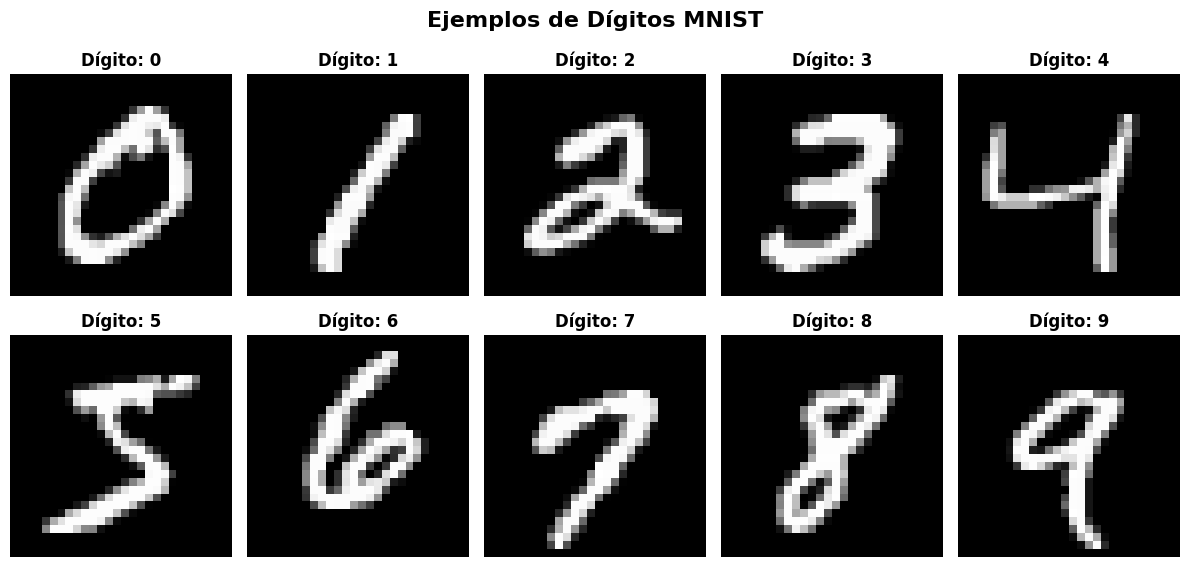

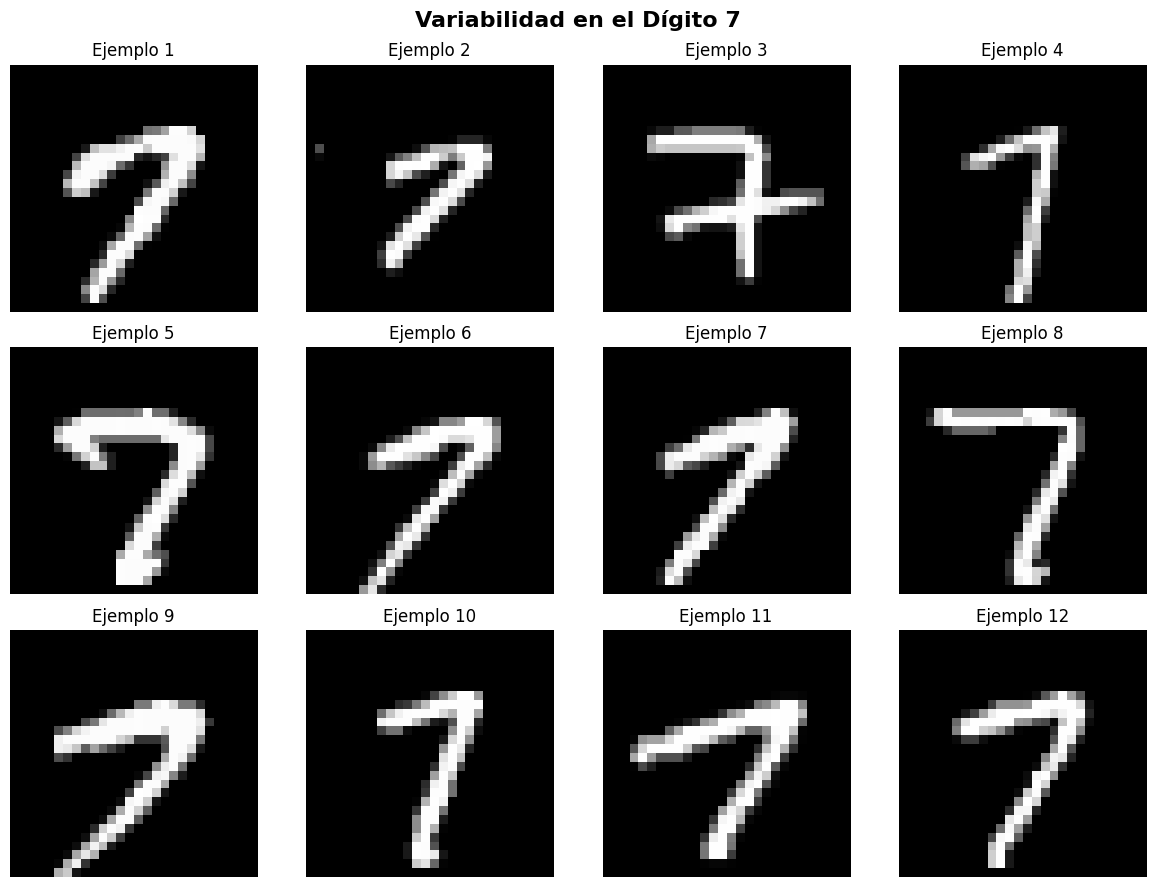

In [3]:
# Cargar datos MNIST directamente desde Keras
print("Cargando dataset MNIST desde Keras...")
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("Dataset cargado exitosamente!")
print(f"\n Información del dataset:")
print(f"   • Datos de entrenamiento: {X_train.shape}")
print(f"   • Etiquetas de entrenamiento: {y_train.shape}")
print(f"   • Datos de prueba: {X_test.shape}")
print(f"   • Etiquetas de prueba: {y_test.shape}")

# Explorar propiedades básicas
print(f"\n Propiedades básicas:")
print(f"   • Tipo de datos: {X_train.dtype}")
print(f"   • Rango de valores: {X_train.min()} - {X_train.max()}")
print(f"   • Clases únicas: {np.unique(y_train)}")

# Distribución de clases
unique, counts = np.unique(y_train, return_counts=True)
print(f"\n Distribución de clases:")
for digit, count in zip(unique, counts):
    print(f"     Dígito {digit}: {count:,} ejemplos")

### Visualización de Ejemplos

# Visualizar ejemplos de cada dígito
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Ejemplos de Dígitos MNIST', fontsize=16, fontweight='bold')

for digit in range(10):
    idx = np.where(y_train == digit)[0][0]
    row, col = digit // 5, digit % 5

    axes[row, col].imshow(X_train[idx], cmap='gray')
    axes[row, col].set_title(f'Dígito: {digit}', fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Mostrar variabilidad
digit_analyze = 7
indices = np.where(y_train == digit_analyze)[0][:12]

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle(f'Variabilidad en el Dígito {digit_analyze}', fontsize=16, fontweight='bold')

for i, idx in enumerate(indices):
    row, col = i // 4, i % 4
    axes[row, col].imshow(X_train[idx], cmap='gray')
    axes[row, col].set_title(f'Ejemplo {i+1}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Paso 2: Preprocesamiento de Datos

In [4]:
# Normalizar píxeles de 0-255 a 0-1
print(" Preprocesando datos...")
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

print(f"   • Rango original: [{X_train.min()}, {X_train.max()}]")
print(f"   • Rango normalizado: [{X_train_normalized.min():.3f}, {X_train_normalized.max():.3f}]")

# Reshape: aplanar imágenes 28x28 a vectores 784
X_train_flat = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_flat = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

print(f"   • Forma original: {X_train_normalized.shape}")
print(f"   • Forma aplanada: {X_train_flat.shape}")

# Para Keras, las etiquetas pueden quedarse como están (no necesitamos one-hot manual)
# Keras puede manejar sparse_categorical_crossentropy
print(f"   • Etiquetas: {y_train.shape} (Keras maneja la conversión automáticamente)")

# Crear conjunto de validación
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_flat, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"\n División de datos:")
print(f"   • Entrenamiento: {X_train_split.shape[0]:,} muestras")
print(f"   • Validación: {X_val_split.shape[0]:,} muestras")
print(f"   • Prueba: {X_test_flat.shape[0]:,} muestras")


 Preprocesando datos...
   • Rango original: [0, 255]
   • Rango normalizado: [0.000, 1.000]
   • Forma original: (60000, 28, 28)
   • Forma aplanada: (60000, 784)
   • Etiquetas: (60000,) (Keras maneja la conversión automáticamente)

 División de datos:
   • Entrenamiento: 48,000 muestras
   • Validación: 12,000 muestras
   • Prueba: 10,000 muestras


# Paso 3: Construcción del Modelo con Keras

 Construyendo modelo con Keras Sequential API...


Model: "MNIST_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


 Detalles del modelo:
   • Parámetros totales: 101,770
   • Capa oculta: 784 × 128 + 128 = 100,480 parámetros
   • Capa salida: 128 × 10 + 10 = 1,290 parámetros


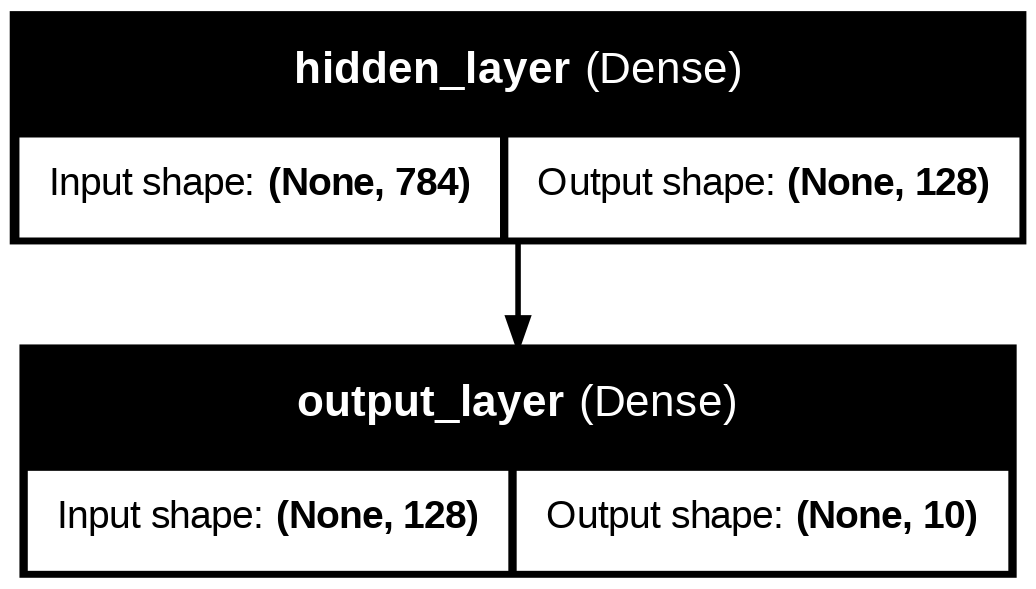

In [5]:
print(" Construyendo modelo con Keras Sequential API...")

# Crear modelo secuencial
model = keras.Sequential([
    # Capa de entrada implícita (784 neuronas)
    layers.Dense(128, activation='relu', input_shape=(784,), name='hidden_layer'),
    layers.Dense(10, activation='softmax', name='output_layer')
], name='MNIST_Classifier')

# Mostrar arquitectura del modelo
model.summary()

print(f"\n Detalles del modelo:")
print(f"   • Parámetros totales: {model.count_params():,}")
print(f"   • Capa oculta: 784 × 128 + 128 = {784 * 128 + 128:,} parámetros")
print(f"   • Capa salida: 128 × 10 + 10 = {128 * 10 + 10:,} parámetros")

###  Visualización de la Arquitectura

# Visualizar arquitectura
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

# Paso 4: Compilación del Modelo

In [6]:
print("Compilando modelo...")

model.compile(
    optimizer='adam',                          # Optimizador Adam (más avanzado que SGD)
    loss='sparse_categorical_crossentropy',    # Pérdida para clasificación multiclase
    metrics=['accuracy']                       # Métricas a monitorear
)

print(" Modelo compilado exitosamente!")
print("\n Configuración de compilación:")
print("   • Optimizer: Adam (learning_rate=0.001 por defecto)")
print("   • Loss: sparse_categorical_crossentropy")
print("   • Metrics: accuracy")
print("\n ¿Por qué estas opciones?")
print("   • Adam: Optimizador adaptativo, mejor que SGD básico")
print("   • sparse_categorical: No necesita one-hot encoding manual")
print("   • accuracy: Métrica fácil de interpretar para clasificación")


Compilando modelo...
 Modelo compilado exitosamente!

 Configuración de compilación:
   • Optimizer: Adam (learning_rate=0.001 por defecto)
   • Loss: sparse_categorical_crossentropy
   • Metrics: accuracy

 ¿Por qué estas opciones?
   • Adam: Optimizador adaptativo, mejor que SGD básico
   • sparse_categorical: No necesita one-hot encoding manual
   • accuracy: Métrica fácil de interpretar para clasificación


# Paso 5: Entrenamiento del Modelo

In [7]:
print(" Iniciando entrenamiento...")

# Configurar callbacks para mejor monitoreo
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.0001,
        verbose=1
    )
]

# Entrenar el modelo
history = model.fit(
    X_train_split, y_train_split,
    batch_size=64,
    epochs=50,
    validation_data=(X_val_split, y_val_split),
    callbacks=callbacks,
    verbose=1
)

print("\n Entrenamiento completado!")

 Iniciando entrenamiento...
Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8428 - loss: 0.5711 - val_accuracy: 0.9448 - val_loss: 0.1930 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9522 - loss: 0.1657 - val_accuracy: 0.9572 - val_loss: 0.1464 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9674 - loss: 0.1149 - val_accuracy: 0.9628 - val_loss: 0.1267 - learning_rate: 0.0010
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9753 - loss: 0.0867 - val_accuracy: 0.9657 - val_loss: 0.1176 - learning_rate: 0.0010
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9807 - loss: 0.0682 - val_accuracy: 0.9669 - val_loss: 0.1129 - learning_rate: 0.0010
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9849 - loss: 0.0546 - val_accuracy: 0.9679 - val_loss: 0.1120 - learning_rate: 0.0010
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accura

# Paso 6: Visualización de Resultados de Entrenamiento

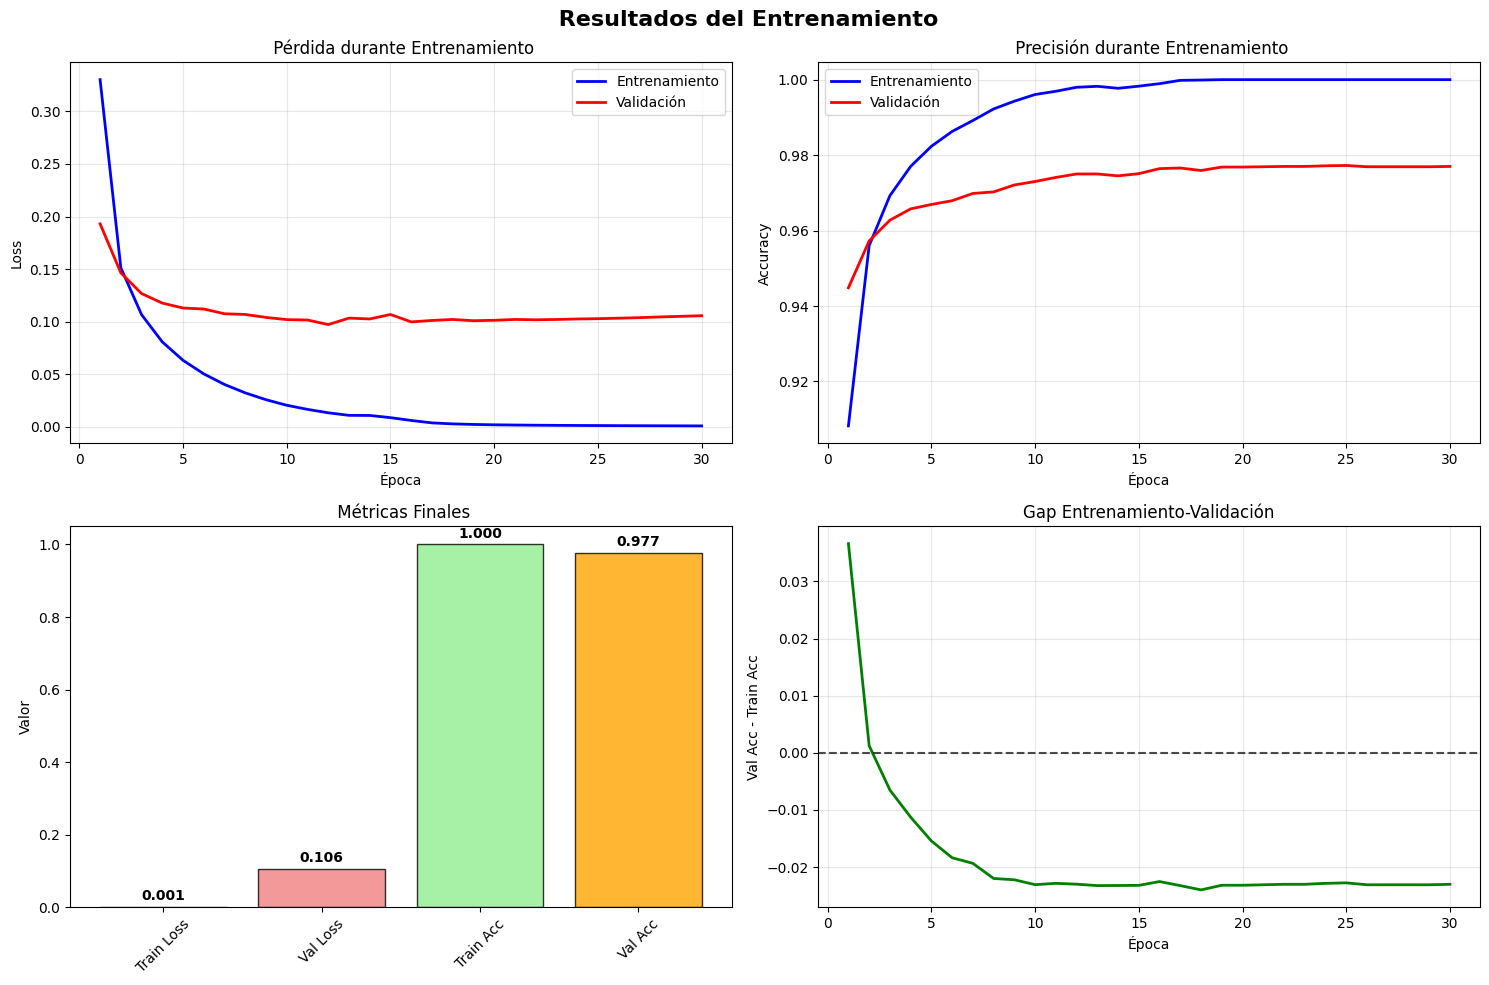


 RESUMEN DE ENTRENAMIENTO:
   • Épocas entrenadas: 30
   • Mejor pérdida de entrenamiento: 0.0007
   • Mejor pérdida de validación: 0.0972
   • Mejor exactitud de entrenamiento: 1.0000
   • Mejor exactitud de validación: 0.9772


In [10]:
# Extraer métricas del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(1, len(train_loss) + 1)

# Crear visualizaciones
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(' Resultados del Entrenamiento', fontsize=16, fontweight='bold')

# Pérdida
ax1.plot(epochs_range, train_loss, 'b-', label='Entrenamiento', linewidth=2)
ax1.plot(epochs_range, val_loss, 'r-', label='Validación', linewidth=2)
ax1.set_title(' Pérdida durante Entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Precisión
ax2.plot(epochs_range, train_acc, 'b-', label='Entrenamiento', linewidth=2)
ax2.plot(epochs_range, val_acc, 'r-', label='Validación', linewidth=2)
ax2.set_title(' Precisión durante Entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Métricas finales
final_metrics = ['Train Loss', 'Val Loss', 'Train Acc', 'Val Acc']
final_values = [train_loss[-1], val_loss[-1], train_acc[-1], val_acc[-1]]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'orange']

ax3.bar(final_metrics, final_values, color=colors, alpha=0.8, edgecolor='black')
ax3.set_title(' Métricas Finales')
ax3.set_ylabel('Valor')
ax3.tick_params(axis='x', rotation=45)
for i, v in enumerate(final_values):
    ax3.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Progreso de aprendizaje
ax4.plot(epochs_range, np.array(val_acc) - np.array(train_acc), 'g-', linewidth=2)
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.7)
ax4.set_title('Gap Entrenamiento-Validación')
ax4.set_xlabel('Época')
ax4.set_ylabel('Val Acc - Train Acc')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Imprimir resumen de entrenamiento
print(f"\n RESUMEN DE ENTRENAMIENTO:")
print(f"   • Épocas entrenadas: {len(train_loss)}")
print(f"   • Mejor pérdida de entrenamiento: {min(train_loss):.4f}")
print(f"   • Mejor pérdida de validación: {min(val_loss):.4f}")
print(f"   • Mejor exactitud de entrenamiento: {max(train_acc):.4f}")
print(f"   • Mejor exactitud de validación: {max(val_acc):.4f}")


# Paso 7: Evaluación Final en Conjunto de Prueba

 Evaluando modelo en conjunto de prueba...

 RESULTADOS FINALES:
   • Precisión de Entrenamiento: 1.0000
   • Precisión de Validación: 0.9770
   • Precisión de Prueba: 0.9793
   • Pérdida de Prueba: 0.0932

 Generando predicciones...


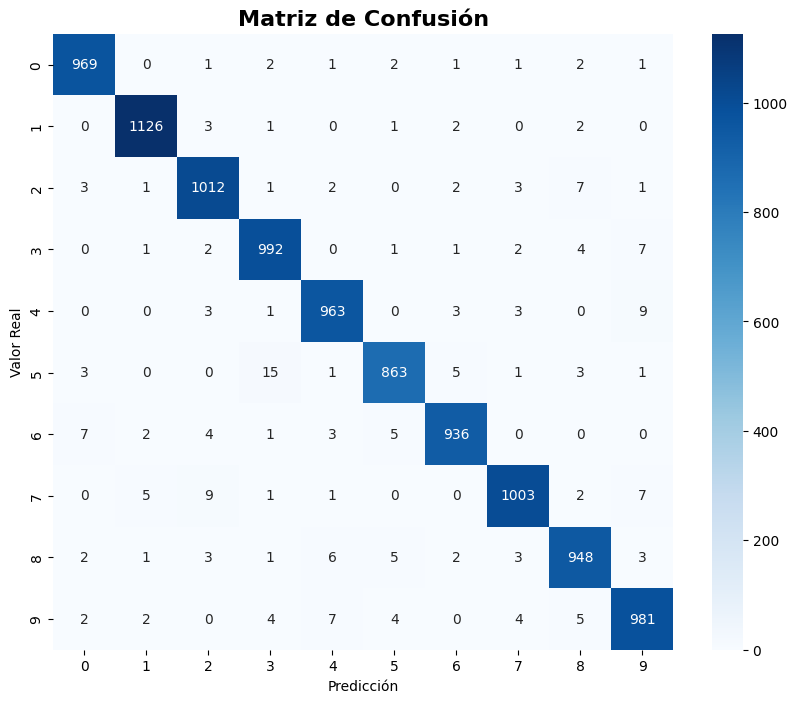


MÉTRICAS POR CLASE:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


 ANÁLISIS DETALLADO POR DÍGITO:
Dígito   Precisión    Recall       F1-Score     Ejemplos  
----------------------------------------------------------------------
0        0.983        0.989        0.986        980      

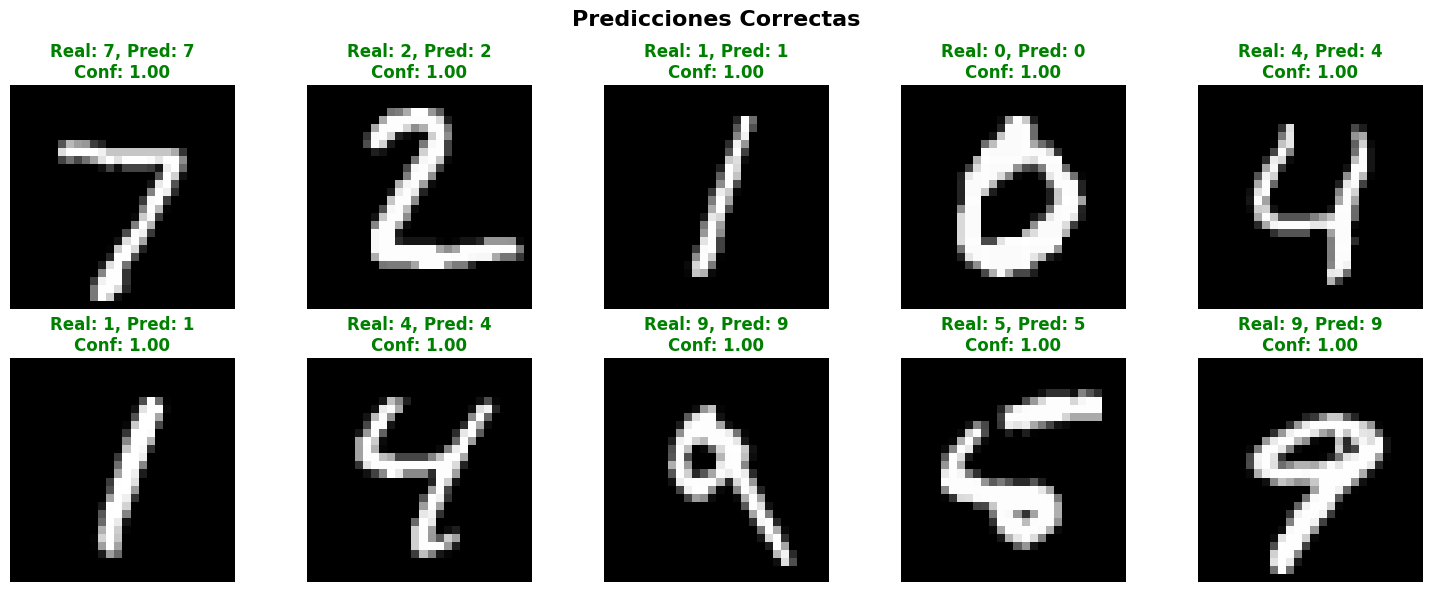

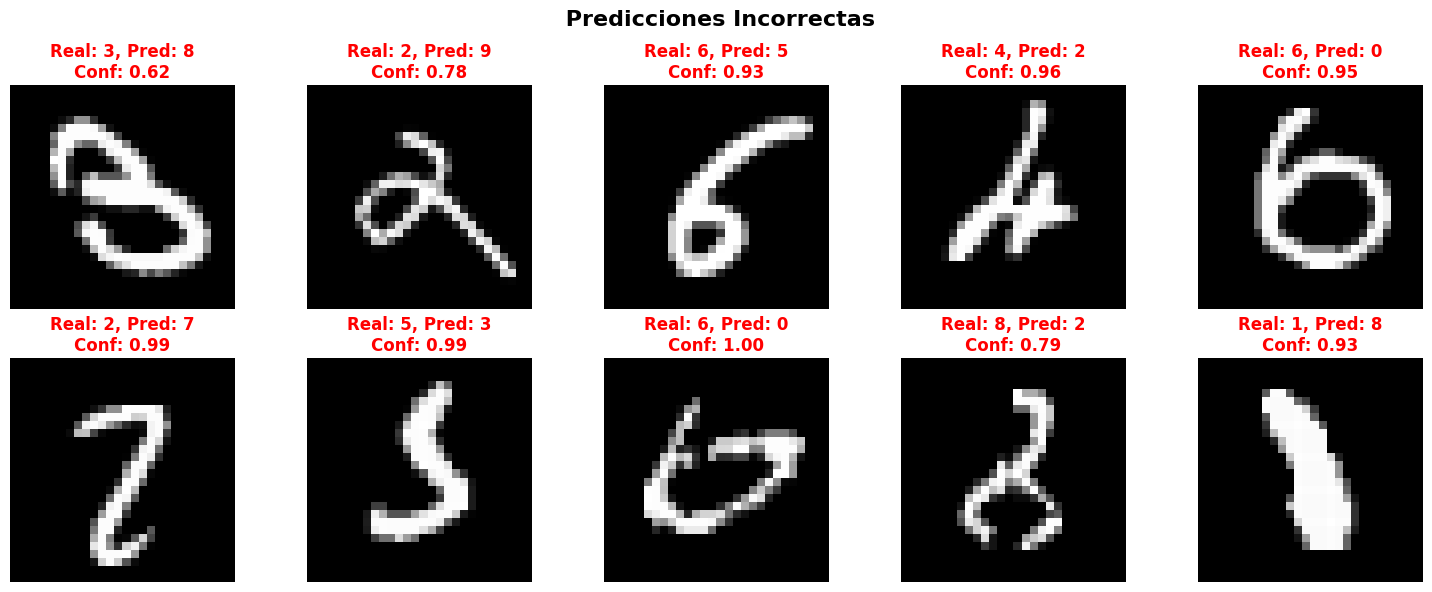

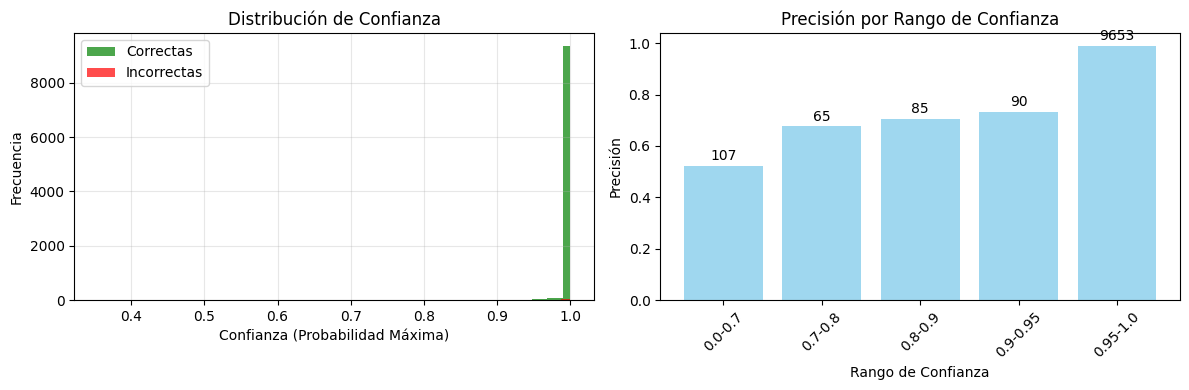


ANÁLISIS DE CONFIANZA:
   • Confianza promedio en correctas: 0.994
   • Confianza promedio en incorrectas: 0.840
   • Predicciones con confianza > 0.9: 9,743 (97.4%)

 RESUMEN FINAL DEL MODELO MNIST CON KERAS/TENSORFLOW:

  ARQUITECTURA:
   • Modelo: Sequential con 2 capas Dense
   • Entrada: 784 neuronas (28×28 píxeles)
   • Capa oculta: 128 neuronas con activación ReLU
   • Salida: 10 neuronas con activación Softmax
   • Parámetros totales: 101,770

  CONFIGURACIÓN:
   • Optimizador: Adam
   • Función de pérdida: sparse_categorical_crossentropy
   • Métricas: accuracy
   • Callbacks: EarlyStopping, ReduceLROnPlateau

 RESULTADOS:
   • Precisión de entrenamiento: 1.0000
   • Precisión de validación: 0.9770
   • Precisión de prueba: 0.9793
   • Épocas entrenadas: 30

 RENDIMIENTO:
   • Mejor dígito: 1 (Precisión: 0.989)
   • Peor dígito: 9 (Precisión: 0.971)
   • Predicciones correctas: 9,793/10,000

 VENTAJAS DE KERAS/TENSORFLOW:
   • Implementación rápida y sencilla
   • Callbacks a

In [9]:
print(" Evaluando modelo en conjunto de prueba...")

# Evaluar en conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test, verbose=0)

print(f"\n RESULTADOS FINALES:")
print(f"   • Precisión de Entrenamiento: {train_acc[-1]:.4f}")
print(f"   • Precisión de Validación: {val_acc[-1]:.4f}")
print(f"   • Precisión de Prueba: {test_accuracy:.4f}")
print(f"   • Pérdida de Prueba: {test_loss:.4f}")

# Hacer predicciones
print("\n Generando predicciones...")
y_pred_proba = model.predict(X_test_flat, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)

### Matriz de Confusión"""

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusión', fontsize=16, fontweight='bold')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Calcular métricas por clase
print("\nMÉTRICAS POR CLASE:")
report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)])
print(report)

### Análisis Detallado por Dígito

# Análisis detallado por dígito
print("\n ANÁLISIS DETALLADO POR DÍGITO:")
print("=" * 70)
print(f"{'Dígito':<8} {'Precisión':<12} {'Recall':<12} {'F1-Score':<12} {'Ejemplos':<10}")
print("-" * 70)

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

for digit in range(10):
    print(f"{digit:<8} {precision[digit]:<12.3f} {recall[digit]:<12.3f} {f1[digit]:<12.3f} {support[digit]:<10}")

# Identificar dígitos más difíciles
worst_digits = np.argsort(precision)[:3]
best_digits = np.argsort(precision)[-3:]

print(f"\n Dígitos más difíciles de clasificar:")
for digit in worst_digits:
    print(f"   • Dígito {digit}: Precisión = {precision[digit]:.3f}")

print(f"\n Dígitos más fáciles de clasificar:")
for digit in reversed(best_digits):
    print(f"   • Dígito {digit}: Precisión = {precision[digit]:.3f}")

### Ejemplos de Predicciones

# Mostrar ejemplos de predicciones correctas e incorrectas
correct_predictions = (y_test == y_pred)
incorrect_predictions = ~correct_predictions

# Obtener índices
correct_indices = np.where(correct_predictions)[0][:10]
incorrect_indices = np.where(incorrect_predictions)[0][:10]

# Visualizar predicciones correctas
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Predicciones Correctas', fontsize=16, fontweight='bold')

for i, idx in enumerate(correct_indices):
    row, col = i // 5, i % 5
    axes[row, col].imshow(X_test[idx], cmap='gray')
    confidence = y_pred_proba[idx][y_pred[idx]]
    axes[row, col].set_title(f'Real: {y_test[idx]}, Pred: {y_pred[idx]}\nConf: {confidence:.2f}',
                           color='green', fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Visualizar predicciones incorrectas
if len(incorrect_indices) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle(' Predicciones Incorrectas', fontsize=16, fontweight='bold')

    for i, idx in enumerate(incorrect_indices):
        if i >= 10:  # Solo mostrar 10 ejemplos
            break
        row, col = i // 5, i % 5
        axes[row, col].imshow(X_test[idx], cmap='gray')
        confidence = y_pred_proba[idx][y_pred[idx]]
        axes[row, col].set_title(f'Real: {y_test[idx]}, Pred: {y_pred[idx]}\nConf: {confidence:.2f}',
                               color='red', fontweight='bold')
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("🎉 ¡Increíble! No hay predicciones incorrectas en la muestra.")

### Análisis de Confianza

# Analizar distribución de confianzas
confidences = np.max(y_pred_proba, axis=1)
correct_confidences = confidences[correct_predictions]
incorrect_confidences = confidences[incorrect_predictions]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(correct_confidences, bins=50, alpha=0.7, color='green', label='Correctas')
plt.hist(incorrect_confidences, bins=50, alpha=0.7, color='red', label='Incorrectas')
plt.title('Distribución de Confianza')
plt.xlabel('Confianza (Probabilidad Máxima)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
confidence_ranges = ['0.0-0.7', '0.7-0.8', '0.8-0.9', '0.9-0.95', '0.95-1.0']
range_counts = []
range_accuracies = []

ranges = [(0.0, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 0.95), (0.95, 1.0)]
for low, high in ranges:
    mask = (confidences >= low) & (confidences < high)
    count = np.sum(mask)
    if count > 0:
        accuracy = np.mean(correct_predictions[mask])
    else:
        accuracy = 0
    range_counts.append(count)
    range_accuracies.append(accuracy)

bars = plt.bar(confidence_ranges, range_accuracies, color='skyblue', alpha=0.8)
plt.title('Precisión por Rango de Confianza')
plt.xlabel('Rango de Confianza')
plt.ylabel('Precisión')
plt.xticks(rotation=45)

# Añadir etiquetas con conteos
for bar, count in zip(bars, range_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nANÁLISIS DE CONFIANZA:")
print(f"   • Confianza promedio en correctas: {np.mean(correct_confidences):.3f}")
if len(incorrect_confidences) > 0:
    print(f"   • Confianza promedio en incorrectas: {np.mean(incorrect_confidences):.3f}")
print(f"   • Predicciones con confianza > 0.9: {np.sum(confidences > 0.9):,} ({np.sum(confidences > 0.9)/len(confidences)*100:.1f}%)")

## Resumen Final

print(f"""
 RESUMEN FINAL DEL MODELO MNIST CON KERAS/TENSORFLOW:

  ARQUITECTURA:
   • Modelo: Sequential con 2 capas Dense
   • Entrada: 784 neuronas (28×28 píxeles)
   • Capa oculta: 128 neuronas con activación ReLU
   • Salida: 10 neuronas con activación Softmax
   • Parámetros totales: {model.count_params():,}

  CONFIGURACIÓN:
   • Optimizador: Adam
   • Función de pérdida: sparse_categorical_crossentropy
   • Métricas: accuracy
   • Callbacks: EarlyStopping, ReduceLROnPlateau

 RESULTADOS:
   • Precisión de entrenamiento: {train_acc[-1]:.4f}
   • Precisión de validación: {val_acc[-1]:.4f}
   • Precisión de prueba: {test_accuracy:.4f}
   • Épocas entrenadas: {len(train_loss)}

 RENDIMIENTO:
   • Mejor dígito: {best_digits[-1]} (Precisión: {precision[best_digits[-1]]:.3f})
   • Peor dígito: {worst_digits[0]} (Precisión: {precision[worst_digits[0]]:.3f})
   • Predicciones correctas: {np.sum(correct_predictions):,}/{len(y_test):,}

 VENTAJAS DE KERAS/TENSORFLOW:
   • Implementación rápida y sencilla
   • Callbacks automáticos para mejor entrenamiento
   • Métricas y evaluación integradas
   • Visualización de arquitectura
   • Optimizadores avanzados (Adam)
   • Manejo automático de gradientes

 PRÓXIMOS PASOS:
   • Probar con Convolutional Neural Networks (CNN)
   • Implementar técnicas de regularización (Dropout, BatchNorm)
   • Experimentar con diferentes arquitecturas
   • Transfer Learning con modelos pre-entrenados
   • Deployment del modelo con TensorFlow Serving

¡Felicitaciones! Se ha implementado exitosamente una red neuronal con Keras/TensorFlow. 🎉
""")